## Importing Libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading dataset

In [138]:
df= pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Telco-Customer-Churn.csv")

In [139]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Nophoneservice,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electroniccheck,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,Oneyear,No,Mailedcheck,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailedcheck,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,Nophoneservice,DSL,Yes,...,Yes,Yes,No,No,Oneyear,No,Banktransfer(automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiberoptic,No,...,No,No,No,No,Month-to-month,Yes,Electroniccheck,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Oneyear,Yes,Mailedcheck,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiberoptic,No,...,Yes,No,Yes,Yes,Oneyear,Yes,Creditcard(automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,Nophoneservice,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electroniccheck,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiberoptic,No,...,No,No,No,No,Month-to-month,Yes,Mailedcheck,74.40,306.60,Yes


## Data preprocessing

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [142]:
df.dropna(inplace=True)

In [143]:
#Analysing distibution of datapoints in target feature
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


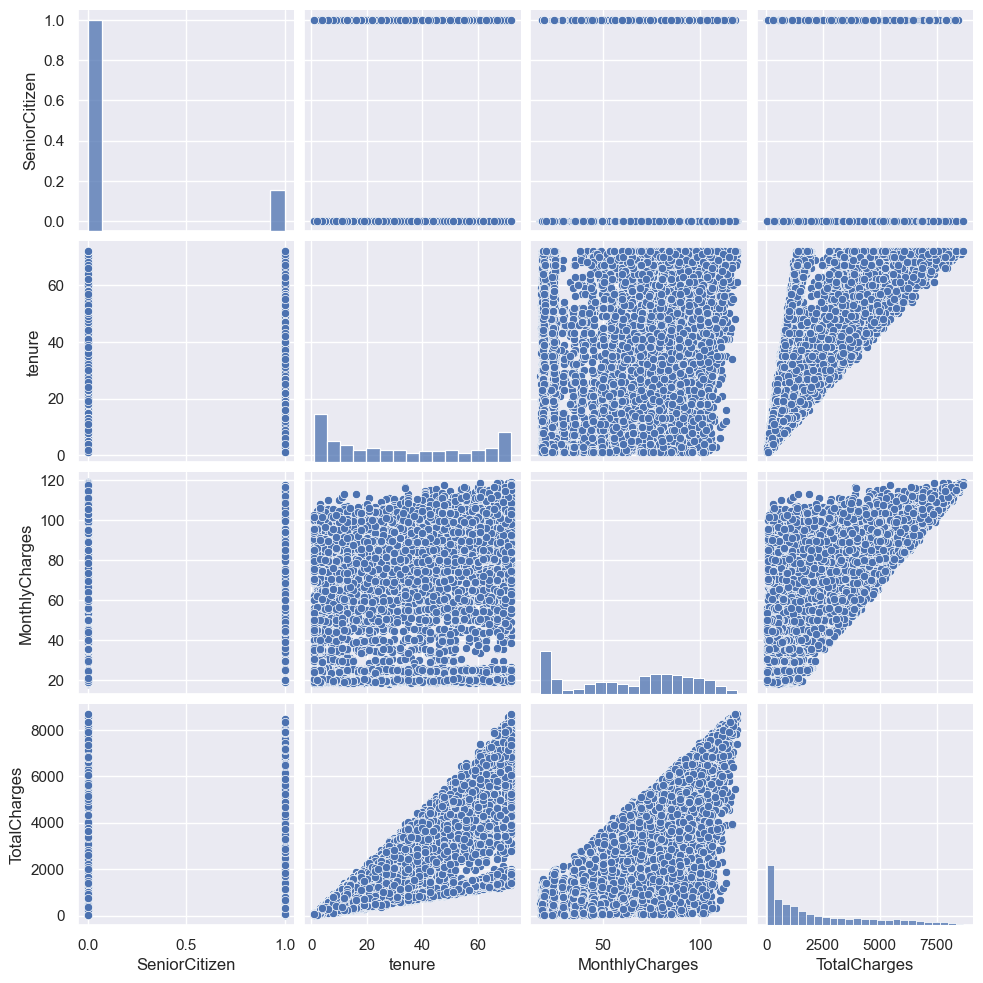

In [144]:
# Visualise relationship between features and churn
sns.pairplot(data=df,kind='scatter')

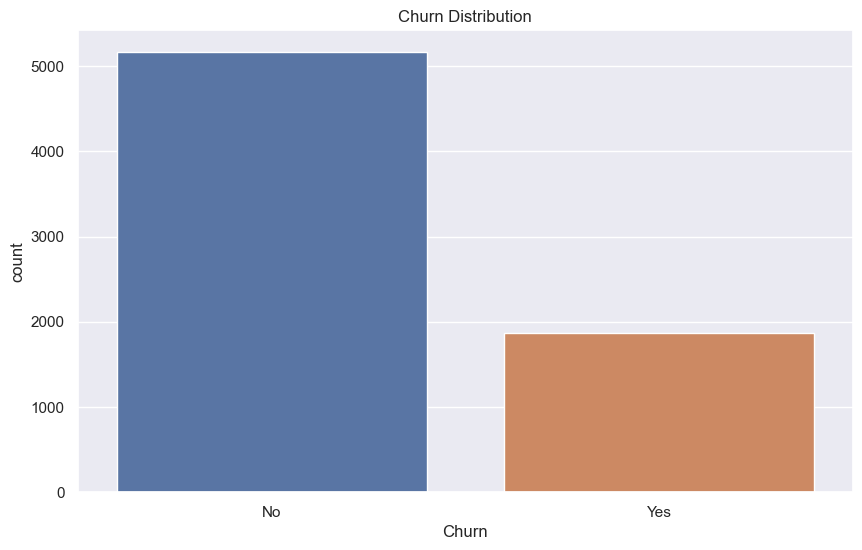

In [146]:
# Visualising churn count
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

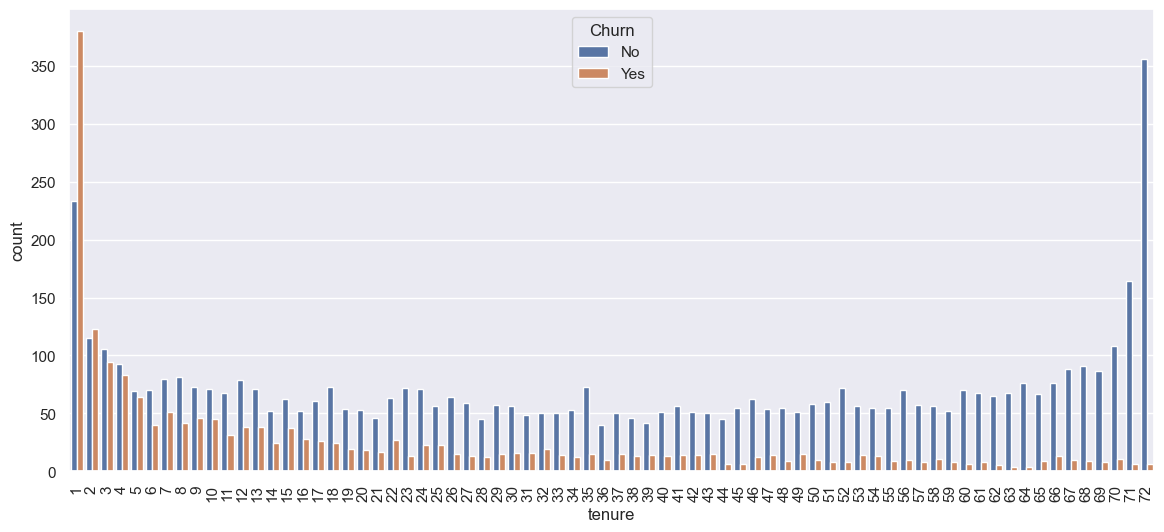

In [147]:
plt.figure(figsize=(14,6))
sns.countplot(x='tenure',hue='Churn',data=df)
plt.xticks(rotation=90)
plt.show()

* From the figure it can be seen that customers whose tenure is less have more attribution rate and t6hose customers who have tenure more than 40 weeks have less attrition rate.

In [148]:
#bucketization
bins=[0,10,20,30,40,50,60,70,80]
labels=['10','20','30','40','50','60','70','80']
df1=pd.cut(x=df['tenure'],bins=bins,labels=labels)

In [149]:
df1.reset_index()

,index,tenure
0,0,10
1,1,40
2,2,10
3,3,50
4,4,10
...,...,...
7027,7038,30
7028,7039,80
7029,7040,20
7030,7041,10


In [150]:
df1=df1.to_frame()

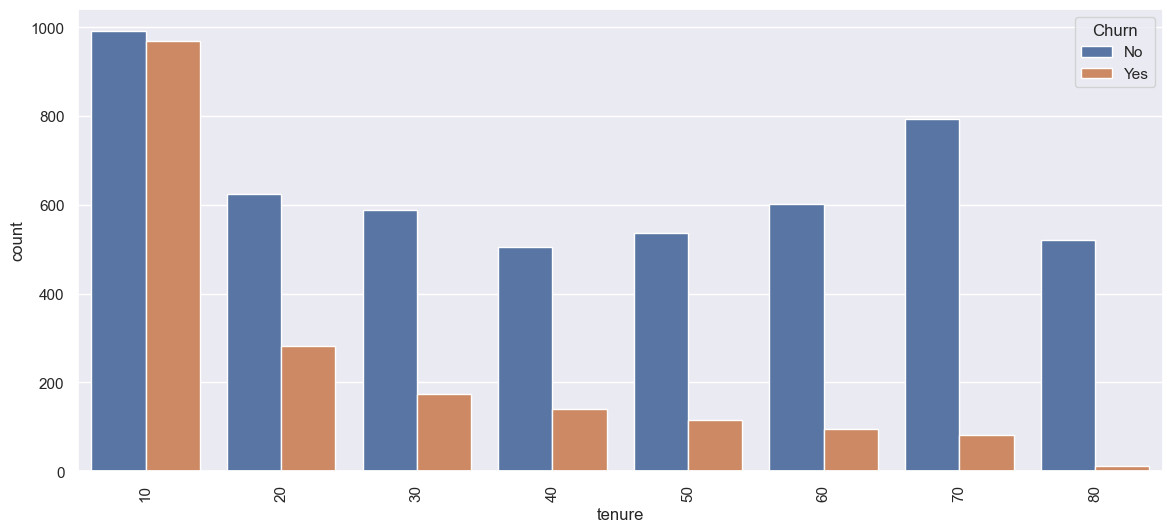

In [151]:
plt.figure(figsize=(14,6))
sns.countplot(x='tenure',hue=df['Churn'],data=df1)
plt.xticks(rotation=90)
plt.show()

In [152]:
from sklearn.preprocessing import LabelEncoder

In [153]:
le=LabelEncoder()

In [154]:
df['gender']= le.fit_transform(df['gender'])

In [155]:
df['Partner']= le.fit_transform(df['Partner'])

In [156]:
df['Dependents']= le.fit_transform(df['Dependents'])

In [157]:
df['PhoneService']= le.fit_transform(df['PhoneService'])

In [158]:
df['MultipleLines']= le.fit_transform(df['MultipleLines'])

In [159]:
df['InternetService']= le.fit_transform(df['InternetService'])

In [160]:
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity'])

In [161]:
df['OnlineBackup']= le.fit_transform(df['OnlineBackup'])

In [162]:
df['DeviceProtection']= le.fit_transform(df['DeviceProtection'])

In [163]:
df['TechSupport']= le.fit_transform(df['TechSupport'])

In [164]:
df['StreamingTV']= le.fit_transform(df['StreamingTV'])

In [165]:
df['StreamingMovies']= le.fit_transform(df['StreamingMovies'])

In [166]:
df['Contract']= le.fit_transform(df['Contract'])

In [167]:
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling'])

In [168]:
df['PaymentMethod']= le.fit_transform(df['PaymentMethod'])

In [169]:
df1=df

In [170]:
df1.drop('customerID',axis=1,inplace=True)

In [171]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,No
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,No
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,No
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,Yes


In [48]:
df1['TotalCharges']=df1['TotalCharges'].str.strip(' ')

In [58]:
df1['TotalCharges']=df1['TotalCharges'].str.strip('')

In [60]:
df1['TotalCharges'].dropna()

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [62]:
df1=df1.replace('',np.nan,inplace=True)

In [77]:
df1=df

In [79]:
df1['TotalCharges']

6530

In [82]:
df1['TotalCharges']=df1['TotalCharges'].astype(float)

In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


In [172]:
X=df1.drop('Churn',axis=1)

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  
 17  

In [175]:
y=df1['Churn']

In [176]:
y.info()

<class 'pandas.core.series.Series'>
Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


In [183]:
#splitting the target feature
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### we need to balance the data to avoid overfitting
* It's generally recommended to perform oversampling or any other form of data manipulation after splitting the dataset into training and testing sets. This ensures that there is no data leakage from the testing set to the training set, which could result in overly optimistic performance estimates.

#### Model before oversampling  

In [184]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [109]:
X.dropna(inplace=True)

In [179]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [185]:
y_pred= rf.predict(X_test)

In [186]:
accuracy = accuracy_score(y_test,y_pred)

In [187]:
accuracy

0.7848341232227488

In [189]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1549
         Yes       0.62      0.48      0.55       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.78      2110



Text(47.25, 0.5, 'Actual')

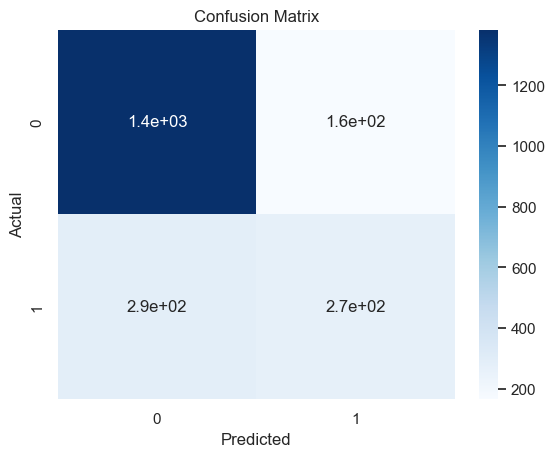

In [192]:
# plotting confusion matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Model after balancing data

In [194]:
from imblearn.over_sampling import SMOTE

In [195]:
smote= SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train,y_train)

In [210]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid={'n_estimators': [150, 200, 250, 300],
                                           'max_depth': [15, 20, 25]})
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [211]:
y_pred1= grid_search.predict(X_test)

In [212]:
accuracy= accuracy_score(y_test,y_pred1)

In [213]:
accuracy

0.7687203791469195

In [214]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

          No       0.84      0.84      0.84      1549
         Yes       0.56      0.57      0.57       561

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110

